# Problem Set 1 

## Question 1: Sea level from seismic reflection
Interpret sea level change from the seismic reflection profile shown below. The figure shows you a real seismic reflection profile (top panel), which has been interpreted (bottom panel) and specific layers have been dated (thick layers with numbers, ages are in Ma). You may use the interpreted version (lower panel) for your analysis. Left is the oceanward side and right is the landward side.

#### a) Mark the clinoform rollover position for layers where it is clearly identifiable with a dot or circle.

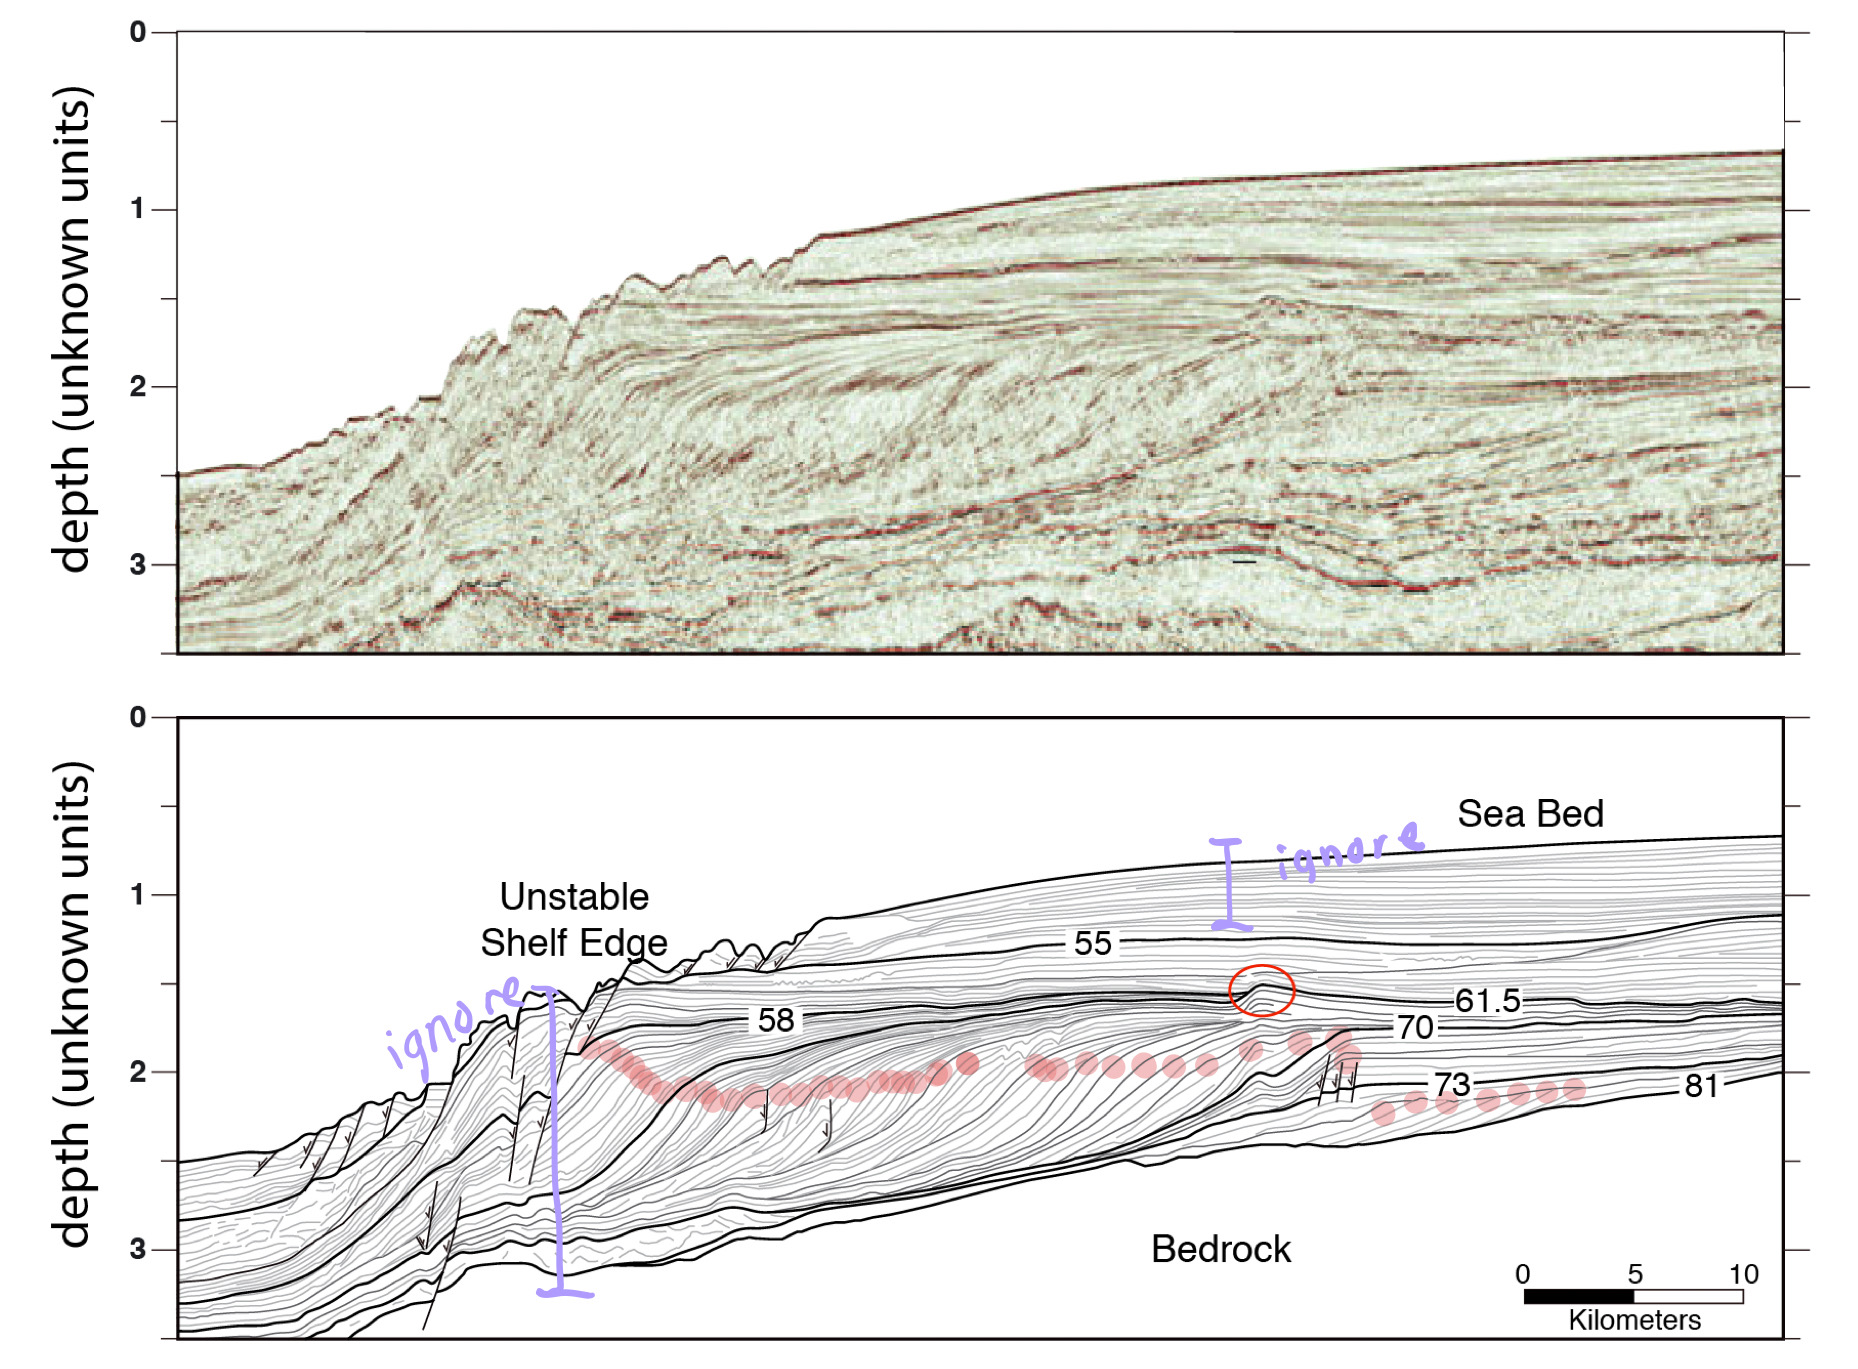

#### b) For each time interval describe whether you identify progradation / degradation / aggradation / retrogradation (or a combination of them).

81-73: progradation then degradation then aggradation

73-70: aggradation

70-61.5: progradation + aggradation

61.5-58: slight progradation + mostly aggradation

58-55: progradation + aggradation

55-0: aggradation

#### c) Use your results from a) to describe how local sea level has qualitatively changed from 81 Ma to 55 Ma and provide explanations for your sea level interpretation.

From 81 - 73 Ma we have a static sea level (causing degradation on the clinoform rollover) and then a slight rise that causes aggradation. From 73 - 70 Ma, we see a sea level rise, producing aggradation of sediments. Then from 70-61.5 Ma, we have progradation and aggradation, indicating a slower sea level rise with a very high sediment flux. Then from 61.5-58 Ma, we see slight progradation with aggradation indicating a sea level rise. Then from 58-55 Ma, we see a sea level increase with a low sediment flux, causing sediment beds to accumulate stacked one on top of the other without any progradation. 

#### d) Is this an area with generally high sediment input or not?

Yes, this is definitely an area with high sediment input. We can tell that by the near constant progradation and aggradation over time. To my eye, I don't see any moment where we have low sediment input and there is retrogradation. If the system was sediment starved we would not see any progradation outwards. 

## Question 2: Hypsometry and continental flooding
Investigate differential sea level change in Australia between the North and the South using hypsometry:

#### a) Produce a hypsometric curve for Australia. 
To do this load the provided topography grid (etopo_ice_15.mat or etopo_ice_15.mat, whichever format you prefer) and isolate Australia. Since Australia is relatively close to the equator you may assume that a lat-lon projection is equal area. Calculate the cumulative amount of area per elevation (i.e. hypsometric curve), starting at elevation -200m to the highest elevation present. Present two plots, one showing the topographic map isolating Australia that you’re using and the other being the hypsometric curve. In addition to the plots, please submit your code that you use to calculate the hypsometric curve. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.interpolate import griddata
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from matplotlib import path

from matplotlib import colorbar as colorbar
import cmocean

In [2]:
# load etopo
etopo = np.load('etopo_ice_15.npy')

# better for irregularly space data
print('linear interpolation ...')
lon = np.arange(etopo[:,0].min(),etopo[:,0].max()+1,0.5)
lat = np.arange(etopo[:,1].min(),etopo[:,1].max()+1,0.5)
lon2,lat2 = np.meshgrid(lon,lat)
topo2 = griddata((etopo[:,0],etopo[:,1]),etopo[:,2],(lon2, lat2), method='linear')

linear interpolation ...


In [3]:
#australia polygon
p = path.Path([(112.3,-17.4), (130.35,-10.13), (142.8,-9.96), (156.2,-25.1), 
               (148,-44.95), (131.24,-35.9), (114.6,-35.6), (111.4,-21)])

tmp = np.array((etopo[:,0],etopo[:,1])).T
mask = p.contains_points(tmp)

In [4]:
# set points outside of aus as nans
etopo[~mask,2] = np.nan

# get the number of unique elements in etopo 
num1 = np.unique(etopo[:,0]).size
num2 = np.unique(etopo[:,1]).size

#transpose
lon2 = np.reshape(etopo[:,0],(num1,num2)).T
lat2 = np.reshape(etopo[:,1],(num1,num2)).T
topo2 = np.reshape(etopo[:,2],(num1,num2)).T

In [6]:
nume = etopo[~np.isnan(etopo[:,2]),2].size
elevations = np.linspace(-400,1500, 500)

percents = []

for i, elevation in enumerate(elevations):
    percents.append(etopo[etopo[:,2] >= elevation,2].size)
    
SA = 100*np.array(percents)/nume

In [7]:
llat = p.vertices[:,1].min()-1
ulat = p.vertices[:,1].max()+1
llon = p.vertices[:,0].min()-1
ulon = p.vertices[:,0].max()+1

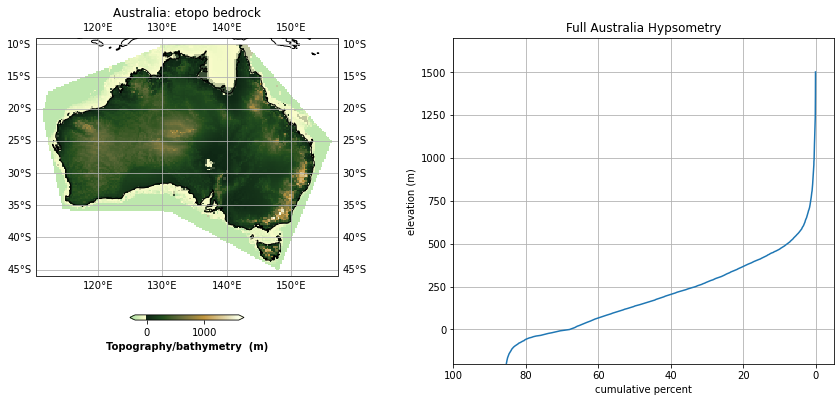

In [8]:
#Set the figure window size
fig, ax = plt.subplots(1,2, figsize=(15,6))
#ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())
cmap = cmocean.cm.topo
cmap1 =  cmocean.tools.crop(cmap, vmin= -200, vmax = 1600, pivot = 0)

ax[0] = plt.subplot(1,2,1, projection=ccrs.PlateCarree())
# set the extent
ax[0].set_extent([llon, ulon, llat, ulat], crs=ccrs.PlateCarree())
ax[0].add_feature(cfeature.COASTLINE.with_scale('50m'))
ax[0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add data
pc = ax[0].pcolormesh(lon2,lat2, topo2,
                   vmin = -200, vmax = 1600, cmap = cmap1,transform=ccrs.PlateCarree())

#Set colormap parameters
cax,kw = colorbar.make_axes(ax[0],
                            location='bottom',
                            pad=0.12,
                            shrink=0.3,)
cb=fig.colorbar(pc,cax=cax,extend='both',**kw)
cb.set_label('Topography/bathymetry  (m)',size=10, weight='bold')

ax[0].set_title('Australia: etopo bedrock')

ax[1].plot(SA, elevations)
ax[1].set_xlim(100,-5)
ax[1].set_ylim(-200,1700)
ax[1].set_xlabel('cumulative percent')
ax[1].set_ylabel('elevation (m)')
ax[1].set_title('Full Australia Hypsometry')
ax[1].grid(True);

#### b) Now we will compare hypsometry in the northern part of the island versus the southern part. 
First, remove areas that have undergone recent volcanism and basin formation. To do that you can remove areas east of 135oE in your analysis. Next produce a hypsometric curve for the northern part (you may choose this to be north of 25oS) and the southern part (you may choose this to be south of 25oS). Present again two plots, one showing the topographic map isolating the northern and southern region that you’re using (could be two separate plots) and the other being the hypsometric curves for each region.

In [9]:
# load etopo
etopo = np.load('etopo_ice_15.npy')

# better for irregularly space data
print('linear interpolation ...')
lon = np.arange(etopo[:,0].min(),etopo[:,0].max()+1,0.5)
lat = np.arange(etopo[:,1].min(),etopo[:,1].max()+1,0.5)
lon2,lat2 = np.meshgrid(lon,lat)
topo2 = griddata((etopo[:,0],etopo[:,1]),etopo[:,2],(lon2, lat2), method='linear')

linear interpolation ...


In [10]:
#polygon for Northwest Australia
nwaus = path.Path([(135, -9.37), (112.5, -16.3), (110, -25), (135,-25)])

tmp = np.array((etopo[:,0],etopo[:,1])).T
nw_mask = nwaus.contains_points(tmp)

# set points outside of aus as nans
etopo[~nw_mask,2] = np.nan

# get the number of unique elements in etopo 
num1 = np.unique(etopo[:,0]).size
num2 = np.unique(etopo[:,1]).size

#transpose
lon2 = np.reshape(etopo[:,0],(num1,num2)).T
lat2 = np.reshape(etopo[:,1],(num1,num2)).T
topo2 = np.reshape(etopo[:,2],(num1,num2)).T

nw_nume = etopo[~np.isnan(etopo[:,2]),2].size
elevations = np.linspace(-600,1100,500)

percents = []
for i, elevation in enumerate(elevations):
    percents.append(etopo[etopo[:,2] >= elevation,2].size)
    
nw_SA = 100*np.array(percents)/nw_nume

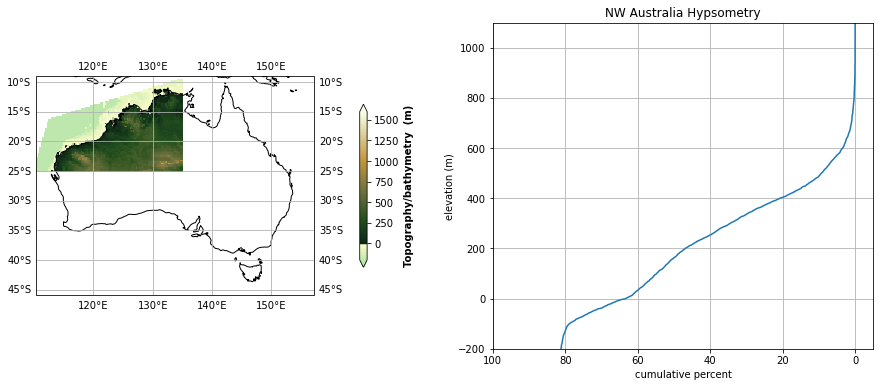

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
cmap = cmocean.cm.topo
cmap1 =  cmocean.tools.crop(cmap, vmin= -200, vmax = 1600, pivot = 0)

ax[0] = plt.subplot(1,2,1, projection=ccrs.PlateCarree())
# set the extent
ax[0].set_extent([llon, ulon, llat, ulat], crs=ccrs.PlateCarree())
ax[0].add_feature(cfeature.COASTLINE.with_scale('50m'))
ax[0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add data
pc = ax[0].pcolormesh(lon2,lat2, topo2,
                   vmin = -200, vmax = 1600, cmap = cmap1,transform=ccrs.PlateCarree())

#Set colormap parameters
cax,kw = colorbar.make_axes(ax[0],
                            location='right',
                            pad=0.12,
                            shrink=0.5,)
cb=fig.colorbar(pc,cax=cax,extend='both',**kw)
cb.set_label('Topography/bathymetry  (m)',size=10, weight='bold')

ax[1].plot(nw_SA, elevations)
ax[1].set_xlim(100,-5)
ax[1].set_ylim(-200,1100)
ax[1].set_xlabel('cumulative percent')
ax[1].set_ylabel('elevation (m)')
ax[1].set_title('NW Australia Hypsometry')
ax[1].grid(True);


In [12]:
# load etopo
etopo = np.load('etopo_ice_15.npy')

# better for irregularly space data
print('linear interpolation ...')
lon = np.arange(etopo[:,0].min(),etopo[:,0].max()+1,0.5)
lat = np.arange(etopo[:,1].min(),etopo[:,1].max()+1,0.5)
lon2,lat2 = np.meshgrid(lon,lat)
topo2 = griddata((etopo[:,0],etopo[:,1]),etopo[:,2],(lon2, lat2), method='linear')

#polygon for Southwest Australia
swaus = path.Path([(110, -25), (135,-25), (135, -36.2), (114, -36.5)])

tmp = np.array((etopo[:,0],etopo[:,1])).T
sw_mask = swaus.contains_points(tmp)

# set points outside of aus as nans
etopo[~sw_mask,2] = np.nan

# get the number of unique elements in etopo 
num1 = np.unique(etopo[:,0]).size
num2 = np.unique(etopo[:,1]).size

#transpose
lon2 = np.reshape(etopo[:,0],(num1,num2)).T
lat2 = np.reshape(etopo[:,1],(num1,num2)).T
topo2 = np.reshape(etopo[:,2],(num1,num2)).T

sw_nume = etopo[~np.isnan(etopo[:,2]),2].size
elevations = np.linspace(-200,800,500)

percents = []
for i, elevation in enumerate(elevations):
    percents.append(etopo[etopo[:,2] >= elevation,2].size)
    
sw_SA = 100*np.array(percents)/sw_nume

llat = p.vertices[:,1].min()-1
ulat = p.vertices[:,1].max()+1
llon = p.vertices[:,0].min()-1
ulon = p.vertices[:,0].max()+1

linear interpolation ...


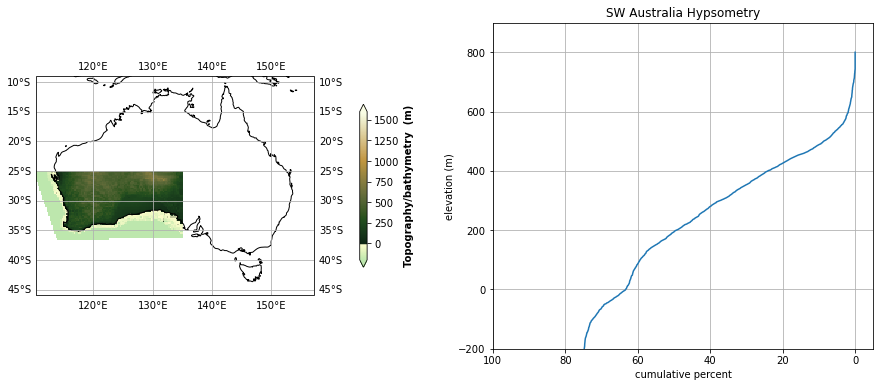

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
cmap = cmocean.cm.topo
cmap1 =  cmocean.tools.crop(cmap, vmin= -200, vmax = 1600, pivot = 0)

ax[0] = plt.subplot(1,2,1, projection=ccrs.PlateCarree())
# set the extent
ax[0].set_extent([llon, ulon, llat, ulat], crs=ccrs.PlateCarree())
ax[0].add_feature(cfeature.COASTLINE.with_scale('50m'))
ax[0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Add data
pc = ax[0].pcolormesh(lon2,lat2, topo2,
                   vmin = -200, vmax = 1600, cmap = cmap1,transform=ccrs.PlateCarree())

#Set colormap parameters
cax,kw = colorbar.make_axes(ax[0],
                            location='right',
                            pad=0.12,
                            shrink=0.5,)
cb=fig.colorbar(pc,cax=cax,extend='both',**kw)
cb.set_label('Topography/bathymetry  (m)',size=10, weight='bold')

ax[1].plot(sw_SA, elevations)
ax[1].set_xlim(100,-5)
ax[1].set_ylim(-200,900)
ax[1].set_xlabel('cumulative percent')
ax[1].set_ylabel('elevation (m)')
ax[1].set_title('SW Australia Hypsometry')
ax[1].grid(True);


#### c) Assuming 30% of the northern and southern part of the continent from b) (including shelves down to -200m) was flooded during the Miocene.
At what elevation would you find the Miocene paleo shoreline today? What does that tell you about the relative motion between the northern and the southern part of the continent?

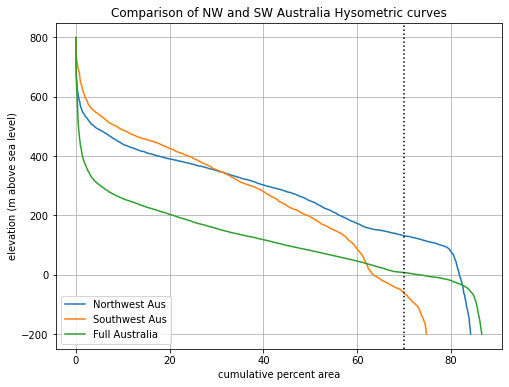

In [28]:
plt.figure(figsize=(8,6))
plt.plot(nw_SA,elevations,label='Northwest Aus')
plt.plot(sw_SA,elevations,label='Southwest Aus')
plt.plot(SA, elevations, label='Full Australia')
plt.axvline(70, c='k', ls=':')
plt.xlabel('cumulative percent area')
plt.ylabel('elevation (m above sea level)')
plt.title('Comparison of NW and SW Australia Hysometric curves')
plt.legend()
plt.grid(True)

I am having issues with my code so it appears that at 30% (i.e. 70% cumulative), NW Australia is at ~125m while SW Australia is at about -50 m. In comparison, the full Australia curve is roughly at 0m at the 30% line. If this is true, This would suggest that NW Australia has uplifted since the Miocene - thereby showing a SL signature at +125m above the average curve and SW Australia has subsided a bit since the Miocene. 

## Question 3: Mid-ocean ridge spreading rate changes and sea level change
Calculate the amount of sea level rise during faster mid ocean ridge spreading. Consider a 2D transect through an ocean basin (see figure below) that stores 20,000 km2 of water

Mantle temperature 1300oC, 
ocean bottom temperature 10oC, 
thermal diffusivity 10-6 m2/s, 
thermal expansivity 3x10 1/K,
densityofwater 1000kg/m
densityofsublithosphericmantle 3000kg/m

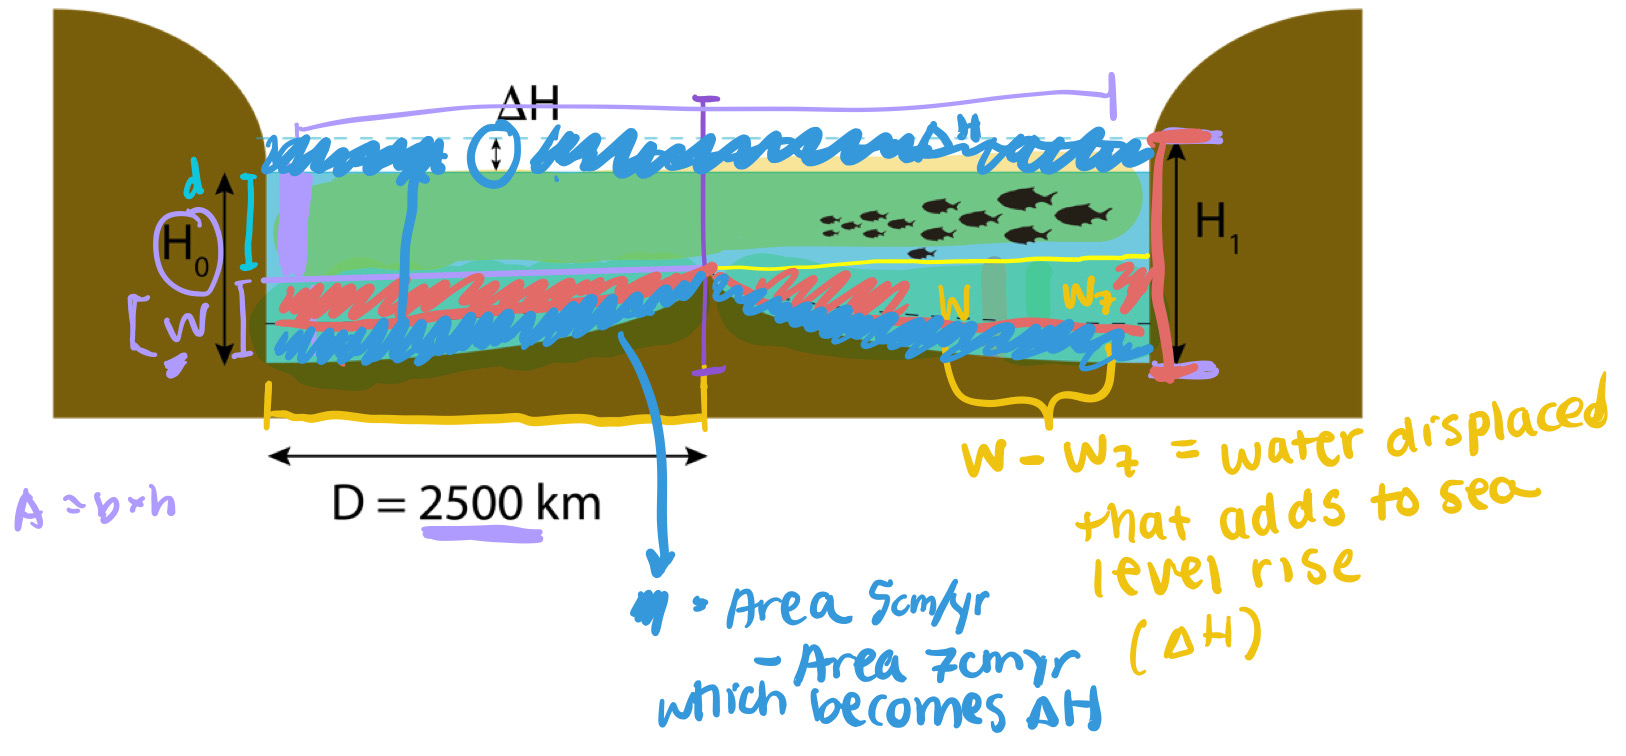

#### a) What is H0 if we assume a half-spreading rate of 5cm/yr. 
You can use the values for constants listed below. Show the equations you are using – if you use pen and paper feel free to submit a photo of it or use a phone app like ‘Tiny Scanner’ to scan it.

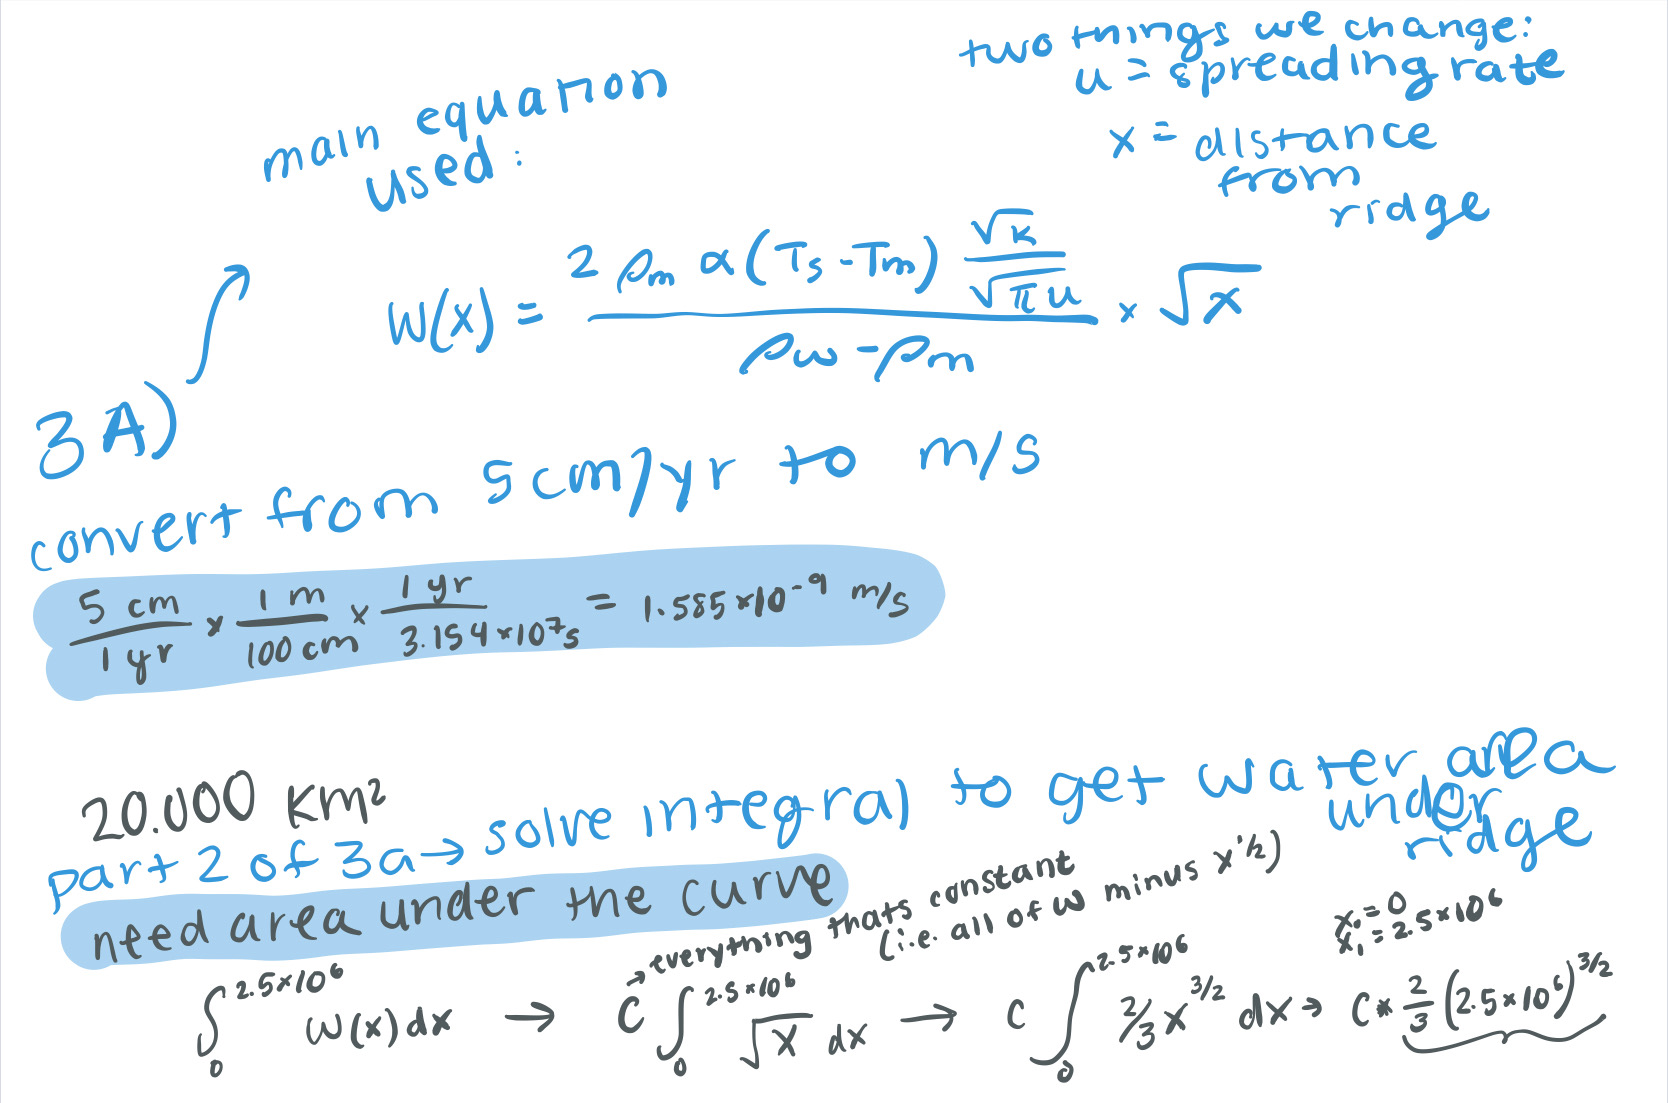

In [19]:
# mantle temp (in kelvin)
Tm = 1573.15
# surface (ocean bottom) temp (in kelvin)
Ts = 283.15
# thermal diffusivity (m2/s)
k = 1e-6
# thermanl expansivity (K)
alpha = 3e-5
# density of water (kg/m3)
d_wat = 1000
# density of mantle (kg/m3)
d_mant = 3000 

# distance from ridge (meters)
x = 2.5e6

# half spreading rate: convert from (cm/yr) to (m/s)
u = 5 / (100 * 3.154e7)
u

1.585288522511097e-09

In [20]:
top = 2*d_mant*alpha*(Ts-Tm)*(np.sqrt(k/(u*np.pi)))
bottom = d_wat-d_mant
W = (top/bottom)*np.sqrt(x)
W
print(f'the water depth below the ridge is {W} meters')

the water depth below the ridge is 2601.196314793266 meters


In [21]:
#constant
c = (top/bottom)
#intergral
igl = (2/3)*(2.5e6)**(3/2)
igl
area_ur = (c*igl*2)/1e6
print(f'the total area of water under the ridge is {area_ur} km2')

the total area of water under the ridge is 8670.654382644218 km2


In [25]:
height_ar = ((2e4 - area_ur) / 5000)*1000
print(f'the depth of the water above the ridge is {height_ar} meters')

the depth of the water above the ridge is 2265.8691234711564 meters


In [26]:
Ho = W + height_ar
print(f'the intial ocean depth (Ho) is {Ho} meters')

the intial ocean depth (Ho) is 4867.0654382644225 meters


#### b) Assume an increase in half-spreading rate (dashed black and blue lines) to 7cm/yr.
Determine H1 and DH. Show your work.

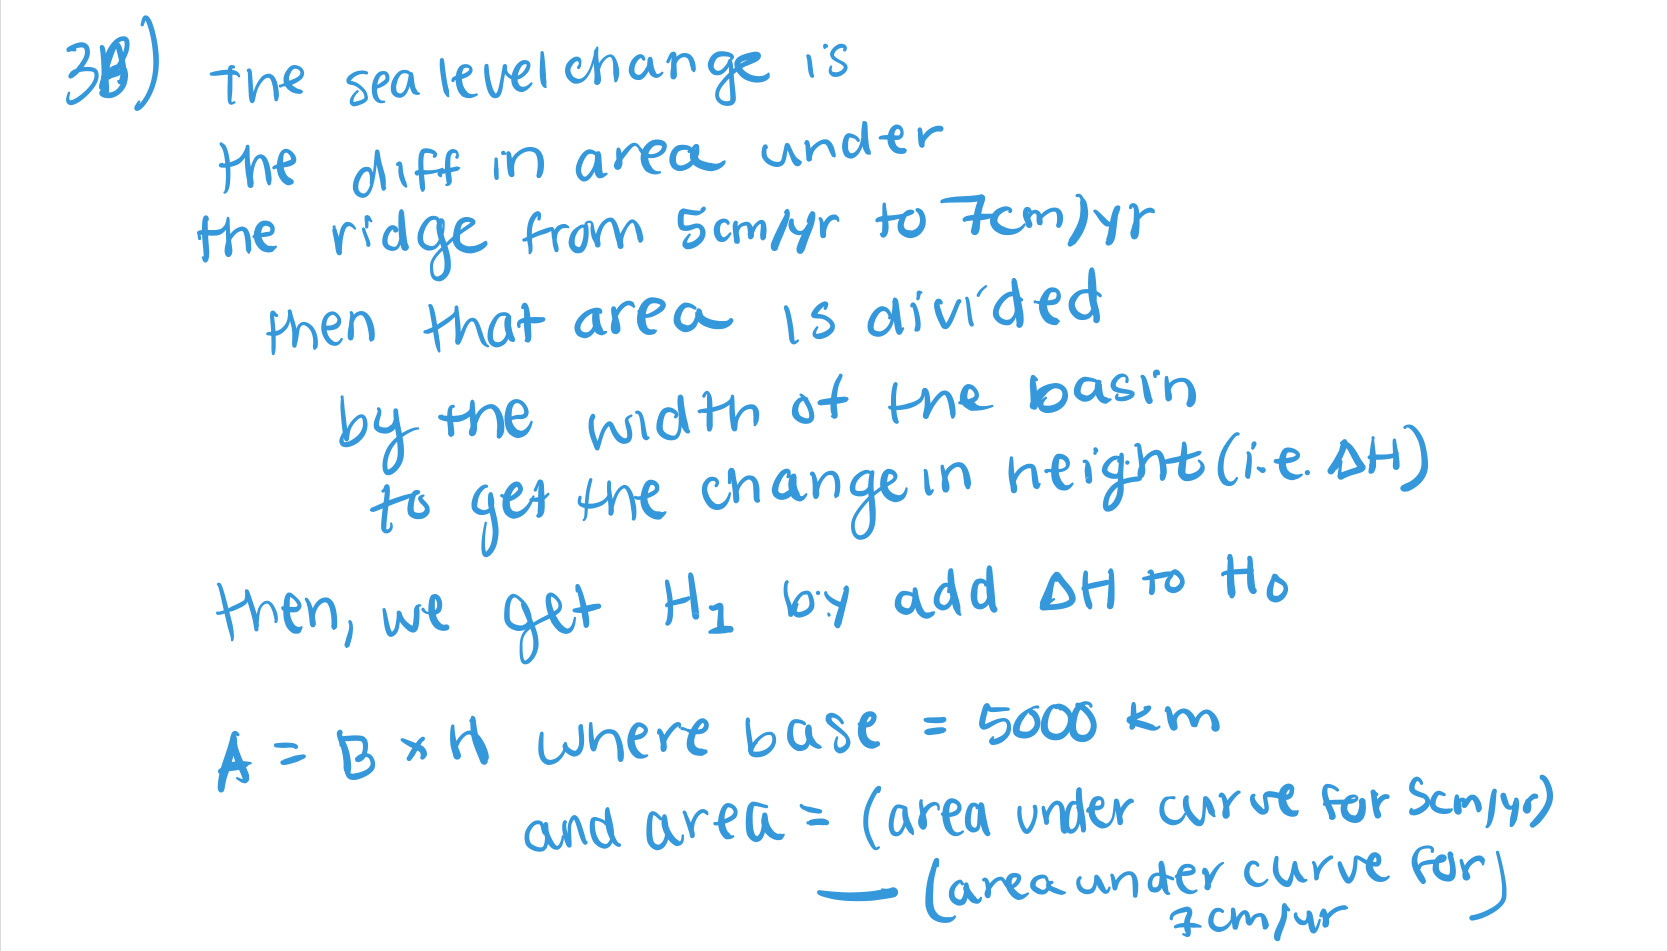

In [41]:
# half spreading rate: convert from (cm/yr) to (m/s)
u_7 = 7 / (100 * 3.154e7)

top = 2*d_mant*alpha*(Ts-Tm)*(np.sqrt(k/(u_7*np.pi)))
bottom = d_wat-d_mant
W_7 = (top/bottom)*np.sqrt(x)
W_7
print(f'the water depth below the ridge is {W_7} meters')

the water depth below the ridge is 2198.412132831667 meters


In [42]:
#constant
c = (top/bottom)
#intergral
igl = (2/3)*(2.5e6)**(3/2)
igl
area_ur_7 = (c*igl*2)/1e6

print(f'the total area of water under the ridge is {area_ur_7} km2')

the total area of water under the ridge is 7328.0404427722215 km2


In [102]:
water_displaced = area_ur - area_ur_7
print(f'the total area of water displaced by increased spreading rate is {water_displaced} km^2')

the total area of water displaced by increased spreading rate is 1342.613939871996 km^2


In [63]:
delH = (water_displaced/5000)*1000
print(f'the change in Height (delH) of the basin caused by increased spreading rate is {delH} m')

the change in Height (delH) of the basin caused by increased spreading rate is 268.5227879743992 m


In [64]:
H1 = delH + Ho
print(f'the height of H1 is {H1} m')

the height of H1 is 5135.588226238821 m


#### c) The figure below assumes passive margins, i.e. no subduction of the oceanic crust underneath the continents to the side. 
Could the presence of subduction zones affect DH and if so, would it lead to a decrease or increase in DH?

#### Answer: 
The presence of a subduction zone at the boundary actually pulls down on the continental crust as the subducting slab subducts down. This pull down creates extra space in the ocean basin so it acts to decrease the sea level. Therefore, the addition of subduction zones would decrease DH.